In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df = pd.read_csv('university_admission.csv')
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [19]:
df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,316.472000,107.193000,3.114000,3.374000,3.484000,8.57644,0.560000,0.72174
std,11.289494,6.079368,1.142939,0.990507,0.924986,0.60451,0.496635,0.14107
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.80000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.12750,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.56000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.04000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.92000,1.000000,0.97000


In [43]:
# # check if there are any Null values
# sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [34]:
# df.hist(bins = 30, figsize = (20, 20), color = 'r');

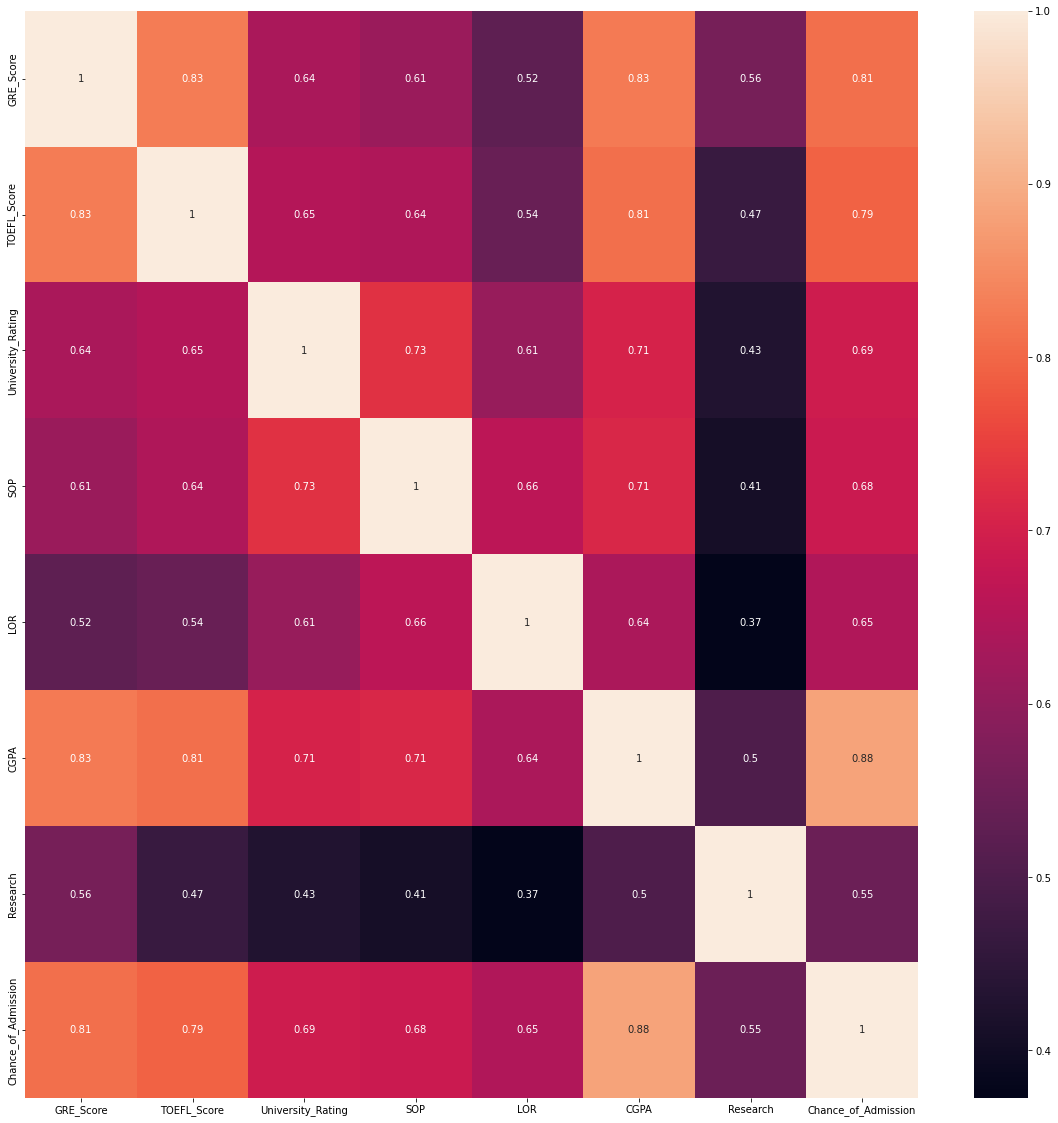

In [7]:
plt.figure(figsize = (20,20))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [8]:
print(df.isnull().sum()[np.where(df.isnull().sum() != 0)[0]])

Series([], dtype: int64)


In [35]:
X = df.drop(columns = ['Chance_of_Admission'])
y = df[['Chance_of_Admission']]

In [44]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')
y = y.ravel()

In [45]:
# spliting the data into training, testing and validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8)

In [46]:
from sklearn.linear_model import BayesianRidge

# Create an instance of the BayesianRidge model
model = BayesianRidge()

# Fit the model to your data
model.fit(X_train, y_train)

BayesianRidge()

In [48]:
result = model.score(X_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.8043037863331964


In [39]:
print("Accuracy :")
print((result))

Accuracy :
0.8097406535457128


In [49]:
y_predict = model.predict(X_test)

In [50]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 0.061 
MSE = 0.003736980449851439 
MAE = 0.04366089939416437 
R2 = 0.8043037863331964 
Adjusted R2 = 0.8025741480810908
